In [1]:
pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 41.0 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [joblib]
   ---------------------------------------- 0/3 [joblib]
   ---------------------------------------- 0/3 [joblib]
   ---------------------------------------- 0/3 [joblib]
   ---------------------------------------- 0/3 [joblib]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ----

In [2]:
pip install pandas numpy matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
from datetime import datetime

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')

# Load the dataset
try:
    df = pd.read_csv('netflix.csv')
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: netflix.csv file not found. Please ensure the file is in the same directory.")
    df = None
except Exception as e:
    print(f"Error loading dataset: {e}")
    df = None

In [4]:
df.shape

(8807, 12)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

First few rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [9]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

            Missing Count  Percentage
director             2634   29.908028
country               831    9.435676
cast                  825    9.367549
date_added             10    0.113546
rating                  4    0.045418
duration                3    0.034064


In [10]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [11]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [12]:
print(f"Earliest: {df['release_year'].min()}")
print(f"Latest: {df['release_year'].max()}")
print(f"Most common: {df['release_year'].mode()[0]}")

Earliest: 1925
Latest: 2021
Most common: 2018


In [13]:

def unnest_column(df, column_name, new_column_name=None):
    
    if new_column_name is None:
        new_column_name = column_name
    
    
    df_copy = df.copy()
    
    
    df_copy[new_column_name] = df_copy[column_name].str.split(', ')
    df_unnested = df_copy.explode(new_column_name)
    
    
    df_unnested[new_column_name] = df_unnested[new_column_name].str.strip()
    
    return df_unnested


print("Creating unnested datasets...")


df_cast = unnest_column(df, 'cast', 'actor')
print(f"Cast unnested: {len(df_cast)} rows")


df_director = unnest_column(df, 'director')
print(f"Director unnested: {len(df_director)} rows")


df_country = unnest_column(df, 'country')
print(f"Country unnested: {len(df_country)} rows")


df_genre = unnest_column(df, 'listed_in', 'genre')
print(f"Genre unnested: {len(df_genre)} rows")

Creating unnested datasets...
Cast unnested: 64951 rows
Director unnested: 9612 rows
Country unnested: 10845 rows
Genre unnested: 19323 rows


In [14]:
df_clean = df.copy()

In [15]:
categorical_columns = ['director', 'cast', 'country', 'rating']

In [16]:
for col in categorical_columns:
    if col in df_clean.columns:
        null_count_before = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(f'Unknown_{col.title()}')
        print(f"{col}: Filled {null_count_before} null values with 'Unknown_{col.title()}'")


director: Filled 2634 null values with 'Unknown_Director'
cast: Filled 825 null values with 'Unknown_Cast'
country: Filled 831 null values with 'Unknown_Country'
rating: Filled 4 null values with 'Unknown_Rating'


In [17]:
continuous_columns = ['release_year']
for col in continuous_columns:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        null_count_before = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(0)
        print(f"{col}: Filled {null_count_before} null values with 0")

In [18]:
print(df_clean.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64


In [19]:
categorical_vars = ['type', 'rating', 'country', 'listed_in']

for var in categorical_vars:
    if var in df_clean.columns:
        print(f"\n=== {var.upper()} VALUE COUNTS ===")
        if var in ['country', 'listed_in']:  
            all_values = []
            for values in df_clean[var].dropna():
                if pd.notna(values) and values != f'Unknown_{var.title()}':
                    all_values.extend([v.strip() for v in str(values).split(',')])
            
            value_counts = pd.Series(all_values).value_counts()
            print(value_counts.head(10))
        else:
            print(df_clean[var].value_counts().head(10))


=== TYPE VALUE COUNTS ===
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

=== RATING VALUE COUNTS ===
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

=== COUNTRY VALUE COUNTS ===
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

=== LISTED_IN VALUE COUNTS ===
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


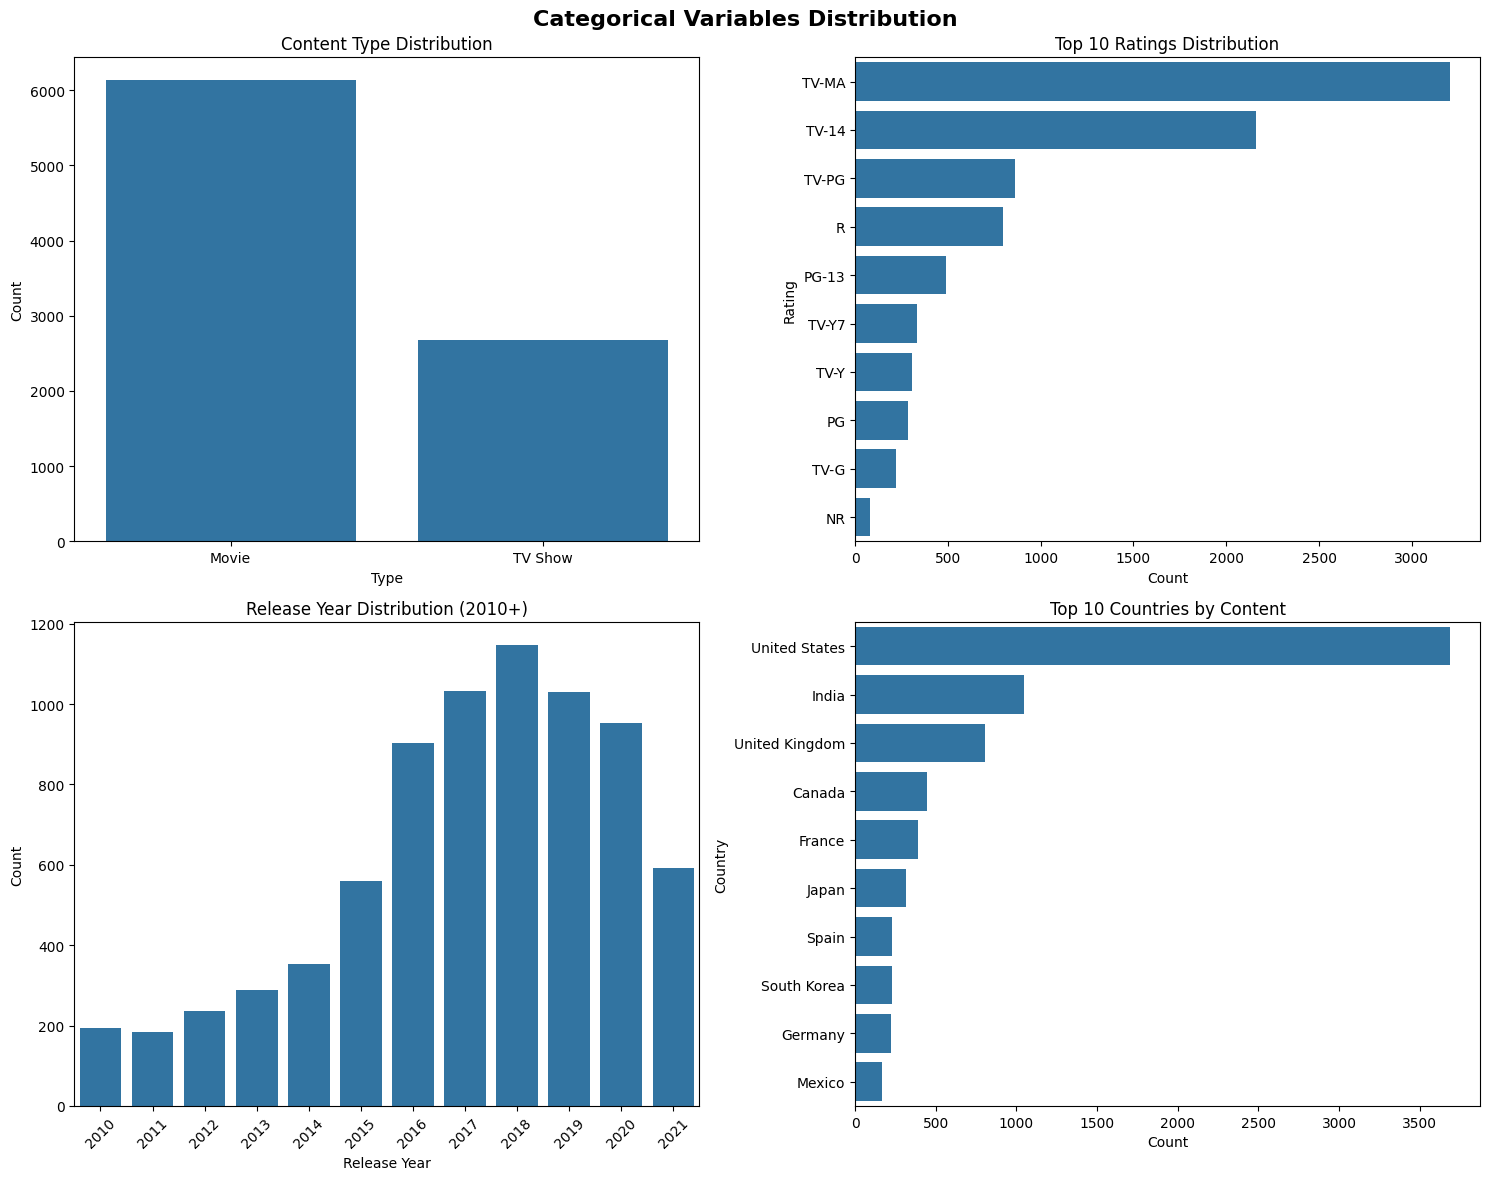

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Categorical Variables Distribution', fontsize=16, fontweight='bold')

sns.countplot(data=df_clean, x='type', ax=axes[0,0])
axes[0,0].set_title('Content Type Distribution')
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Count')

rating_counts = df_clean['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index, ax=axes[0,1])
axes[0,1].set_title('Top 10 Ratings Distribution')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('Rating')

recent_years = df_clean[df_clean['release_year'] >= 2010]
sns.countplot(data=recent_years, x='release_year', ax=axes[1,0])
axes[1,0].set_title('Release Year Distribution (2010+)')
axes[1,0].set_xlabel('Release Year')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

country_counts = []
for countries in df_clean['country'].dropna():
    if countries != 'Unknown_Country':
        country_counts.extend([c.strip() for c in str(countries).split(',')])

top_countries = pd.Series(country_counts).value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1,1])
axes[1,1].set_title('Top 10 Countries by Content')
axes[1,1].set_xlabel('Count')
axes[1,1].set_ylabel('Country')

plt.tight_layout()
plt.show()